In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
data_org = pd.read_csv('Original_data_with_more_rows.csv')
data_extended = pd.read_csv('Expanded_data_with_more_features.csv')

In [3]:
data_org = data_org.drop('Unnamed: 0', axis=1)
data_org.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [5]:
data_org.duplicated().sum()

0

In [6]:
data_org.isna().sum().sum()

0

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


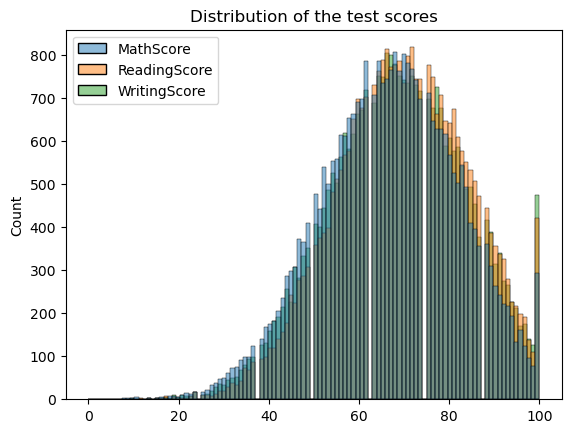

In [9]:
sns.histplot(data_org[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');

In [10]:
data_org.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\3377482359.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_org.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


In [11]:
data_extended = data_extended.drop('Unnamed: 0', axis=1)
data_extended.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [12]:
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [13]:
data_extended['NrSiblings'] = data_extended['NrSiblings'].astype(pd.Int64Dtype())
data_extended['NrSiblings'].dtypes

Int64Dtype()

In [14]:
data_extended.duplicated().sum()

0

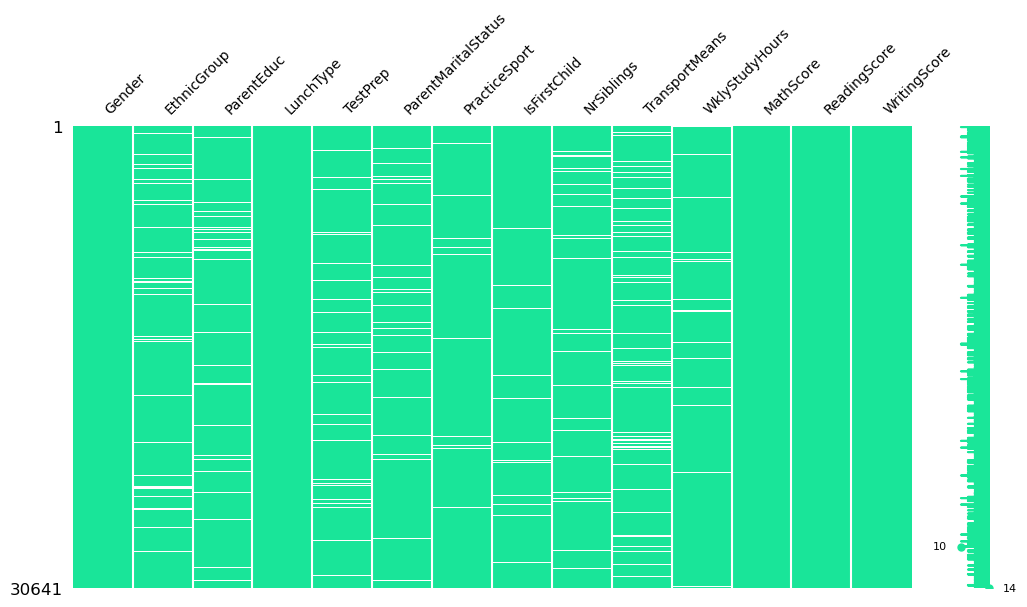

In [15]:
msno.matrix(data_extended,
           figsize=(12, 6),
           color=(0.1, 0.9, 0.6),
           fontsize=10);

In [16]:
for col in data_extended.columns:
    print('Missing values in column {} is {} %'.format(col, np.round(data_extended[col].isnull().sum()*100/(len(data_extended[col])), 1)))

Missing values in column Gender is 0.0 %
Missing values in column EthnicGroup is 6.0 %
Missing values in column ParentEduc is 6.0 %
Missing values in column LunchType is 0.0 %
Missing values in column TestPrep is 6.0 %
Missing values in column ParentMaritalStatus is 3.9 %
Missing values in column PracticeSport is 2.1 %
Missing values in column IsFirstChild is 3.0 %
Missing values in column NrSiblings is 5.1 %
Missing values in column TransportMeans is 10.2 %
Missing values in column WklyStudyHours is 3.1 %
Missing values in column MathScore is 0.0 %
Missing values in column ReadingScore is 0.0 %
Missing values in column WritingScore is 0.0 %


In [17]:
data_extended = data_extended.apply(lambda x: x.fillna(x.value_counts().index[0]))
null_val = data_extended.isna().sum().sum()

if null_val > 0:
    print('Try imputing again, there are {} null values remaining in the dataset'.format(null_val))
else:
    print('Congratulations! You have successfully imputed all the null values in the dataset.')

Congratulations! You have successfully imputed all the null values in the dataset.


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


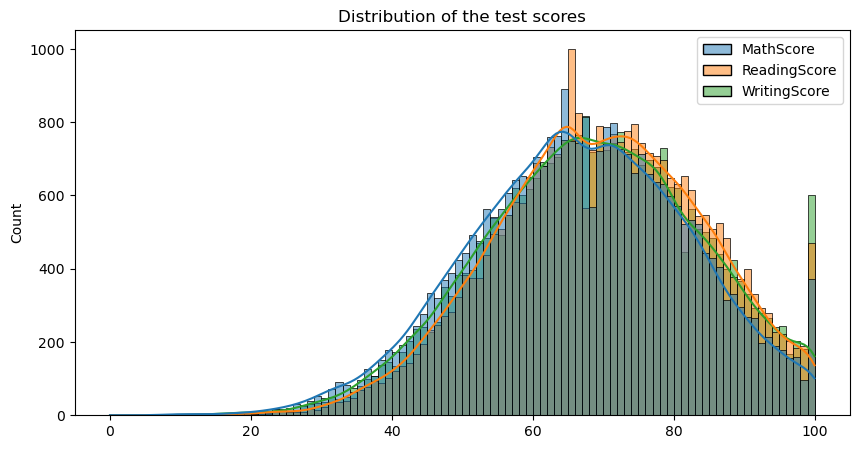

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data_extended[['MathScore', 'ReadingScore', 'WritingScore']], bins=100,  kde=True)
plt.title('Distribution of the test scores');

In [19]:
def display_stats(df, col):
    '''
    Given a dataFrame and the column name, this function calculates and returns two stats summary dataframes. 
    - A normalized value_counts of the categories in the given columns "col" and 
    - A sorted mean of the three test scores grouped by the categories in column "col"    
    '''
    
    val_cnt = df[col].value_counts().to_frame(name=col + ' (count)')
    val_cnt_norm = df[col].value_counts(normalize=True).mul(100).to_frame(name=col + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([col])[['MathScore', 'ReadingScore', 'WritingScore']]\
    .agg(np.mean).sort_values(by='MathScore', ascending=False)
    
    return display(val_cnt_table, mean_score_summary)

In [20]:
data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\4130991671.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])
C:\Users\pc\AppData\Local\Temp\ipykernel_2272\4130991671.py:1: FutureWarning: The provided callable <function std at 0x00000197F1E08540> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])
C:\Users\pc\AppData\Local\Temp\ipykernel_2272\4130991671.py:1: FutureWarning: The provided callable <function max at 0x00000197F1DF79C0> is currently using Series.max. In a future version of pa

,MathScore,ReadingScore,WritingScore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
max,100.000000,100.000000,100.000000
min,0.000000,10.000000,4.000000


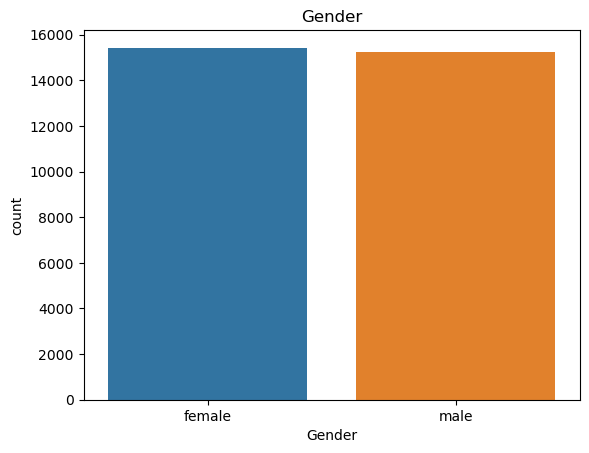

In [24]:
sns.countplot(x=data_extended['Gender'])
plt.title('Gender');

In [25]:
data_extended.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\3237833266.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


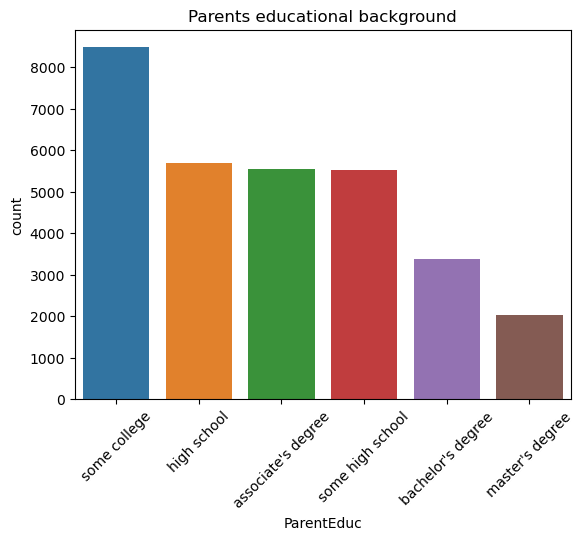

In [26]:
sns.countplot(x=data_extended['ParentEduc'], \
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

In [27]:
display_stats(data_extended, 'ParentEduc')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,ParentEduc (count),ParentEduc (%)
ParentEduc,,
some college,8478,27.668810
high school,5687,18.560099
associate's degree,5550,18.112986
some high school,5517,18.005287
bachelor's degree,3386,11.050553
master's degree,2023,6.602265


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,70.466627,73.062020,73.331069
associate's degree,68.365586,71.124324,70.299099
some college,66.445978,69.189667,68.456711
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


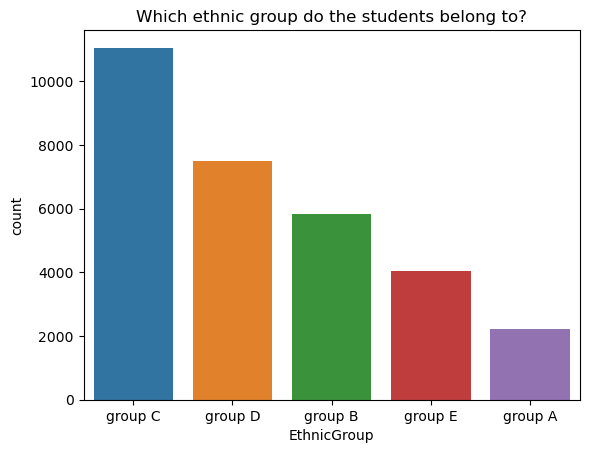

In [28]:
sns.countplot(x=data_extended['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

In [29]:
display_stats(data_extended,'EthnicGroup')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,EthnicGroup (count),EthnicGroup (%)
EthnicGroup,,
group C,11052,36.069319
group D,7503,24.486799
group B,5826,19.013740
group E,4041,13.188212
group A,2219,7.241931


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.298936,74.251423,72.677060
group D,67.666400,70.382247,70.890844
group C,64.943811,68.517734,67.149294
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


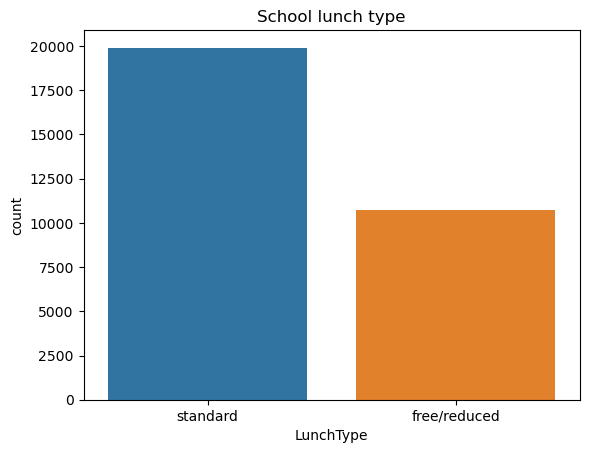

In [30]:
sns.countplot(x=data_extended['LunchType'])
plt.title('School lunch type');

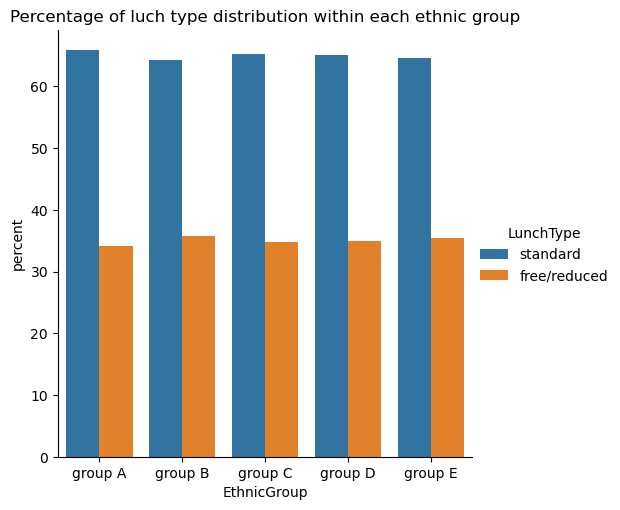

In [34]:
x, y = 'EthnicGroup', 'LunchType'
data_extended.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of luch type distribution within each ethnic group');

In [35]:
display_stats(data_extended, 'LunchType')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,LunchType (count),LunchType (%)
LunchType,,
standard,19905,64.961979
free/reduced,10736,35.038021


,MathScore,ReadingScore,WritingScore
LunchType,,,
standard,70.709370,72.175634,71.529716
free/reduced,58.862332,64.189735,62.650522


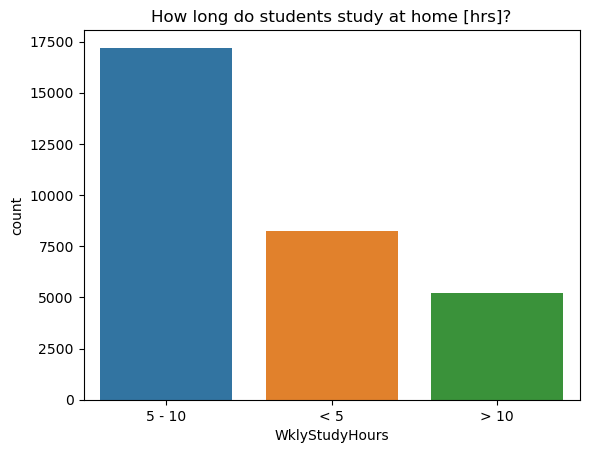

In [36]:
sns.countplot(x=data_extended['WklyStudyHours'], \
             order=['5 - 10', '< 5', '> 10'])
plt.title('How long do students study at home [hrs]?');

In [37]:
display_stats(data_extended, 'WklyStudyHours')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,WklyStudyHours (count),WklyStudyHours (%)
WklyStudyHours,,
5 - 10,17201,56.137202
< 5,8238,26.885546
> 10,5202,16.977253


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
5 - 10,66.859078,69.654148,68.643800
< 5,64.580359,68.176135,67.090192


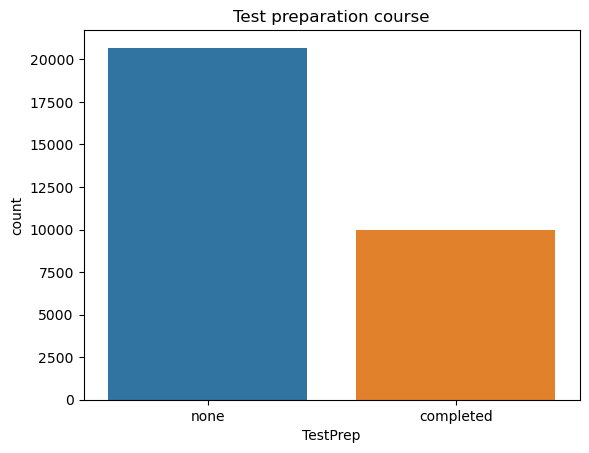

In [38]:
sns.countplot(x=data_extended['TestPrep'])
plt.title('Test preparation course');

In [39]:
display_stats(data_extended, 'TestPrep')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,TestPrep (count),TestPrep (%)
TestPrep,,
none,20686,67.510851
completed,9955,32.489149


,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


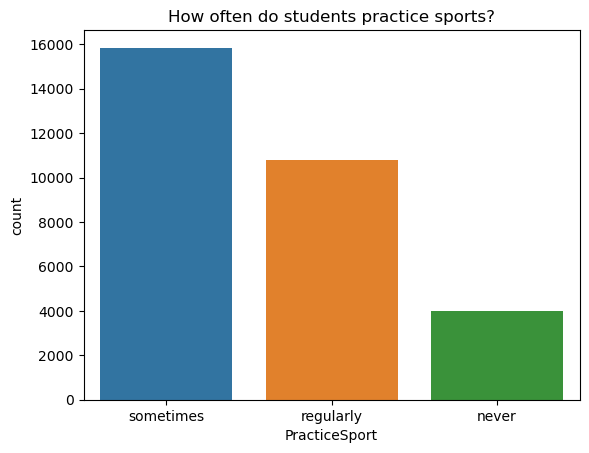

In [40]:
sns.countplot(x=data_extended['PracticeSport'], \
             order = ['sometimes', 'regularly', 'never'])
plt.title('How often do students practice sports?');

In [41]:
display_stats(data_extended, 'PracticeSport')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,PracticeSport (count),PracticeSport (%)
PracticeSport,,
sometimes,15844,51.708495
regularly,10793,35.224046
never,4004,13.067459


,MathScore,ReadingScore,WritingScore
PracticeSport,,,
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255
never,64.171079,68.337662,66.522727


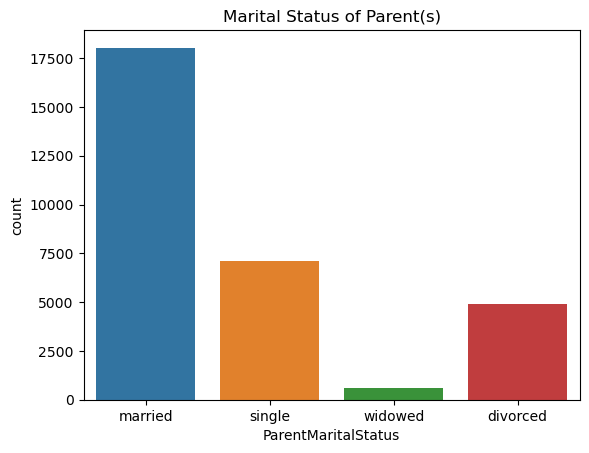

In [42]:
sns.countplot(x=data_extended['ParentMaritalStatus'])
plt.title('Marital Status of Parent(s)');

In [43]:
display_stats(data_extended, 'ParentMaritalStatus')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,ParentMaritalStatus (count),ParentMaritalStatus (%)
ParentMaritalStatus,,
married,18034,58.855781
single,7097,23.161777
divorced,4919,16.053654
widowed,591,1.928788


,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440


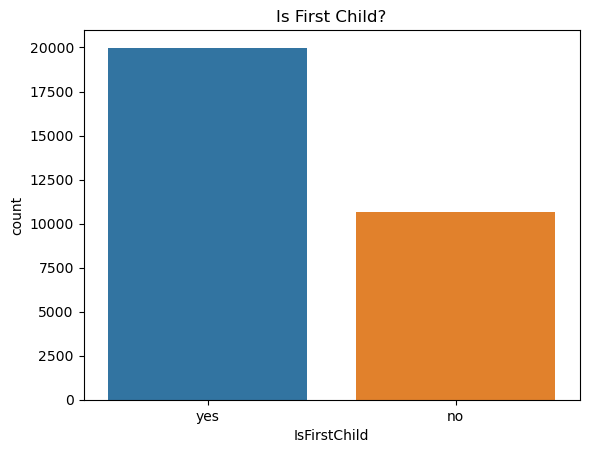

In [45]:
sns.countplot(x=data_extended['IsFirstChild'])
plt.title('Is First Child?');

In [46]:
display_stats(data_extended, 'IsFirstChild')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,IsFirstChild (count),IsFirstChild (%)
IsFirstChild,,
yes,19986,65.226331
no,10655,34.773669


,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
yes,66.724507,69.508106,68.529371
no,66.246832,69.132614,68.210887


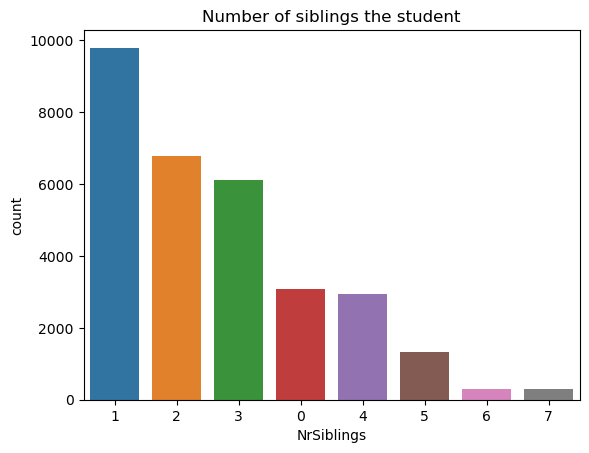

In [47]:
sns.countplot(x=data_extended['NrSiblings'],
             order=[1, 2, 3, 0, 4, 5, 6, 7]
             )
plt.title('Number of siblings the student');

In [48]:
display_stats(data_extended, 'NrSiblings')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,NrSiblings (count),NrSiblings (%)
NrSiblings,,
1,9789,31.947391
2,6790,22.159851
3,6123,19.983029
0,3085,10.068209
4,2941,9.598251
5,1320,4.307953
6,302,0.985608
7,291,0.949708


,MathScore,ReadingScore,WritingScore
NrSiblings,,,
7,67.615120,69.828179,68.986254
0,66.819449,69.547812,68.746515
3,66.719092,69.488159,68.650498
5,66.630303,69.453788,68.282576
2,66.554934,69.472018,68.522533
1,66.450710,69.253346,68.220554
4,66.245495,69.144169,68.073444
6,65.917219,68.801325,67.860927


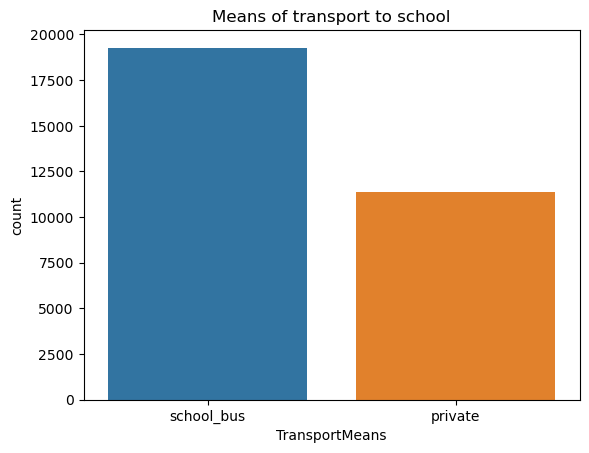

In [49]:
sns.countplot(x=data_extended['TransportMeans'])
plt.title('Means of transport to school');

In [53]:
data_extended.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\431810221.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [54]:
data_extended.groupby(['EthnicGroup', 'Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\347088536.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['EthnicGroup', 'Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [55]:
data_extended.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\4103938660.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [56]:
data_extended.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\3995347020.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [57]:
data_extended.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\1011104485.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [58]:
data_extended.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\2090717482.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


C:\Users\pc\AppData\Local\Temp\ipykernel_2272\2090717482.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [60]:
data_extended.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\3615181666.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [61]:
data_extended.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_2272\2735640445.py:1: FutureWarning: The provided callable <function mean at 0x00000197F1E08400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_extended.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
